In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [161]:
df=pd.read_csv('heart_data.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


3. Check the shape of the data (number of rows and columns). 
Check the general information about the dataframe using the .info() method.

In [8]:
df.shape

(319795, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

 4.Check Check the statistical summary of the dataset and write your inferences.

In [9]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [48]:
df.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


i.the minimum value of the BMI is around 12 and maximum value is 94.85
ii.the mental health indicate that for how many days during the past 30 days was yor mental health not good so that minimum 
  value 0 mean that the person mental health was good throught the month on an average it is 7 days that mental health was not
  good
iii.HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma and SkinCancer column contain binary 
   category 'Yes' or 'No'.
iv.there are 6 different race category
   
   

.5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [10]:
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:\n", missing_percentage)

Percentage of missing values in each column:
 HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64


. there is no missing values in the dataset

6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [12]:
len(df[df.duplicated()])

18078

There are 18078 duplicate records lets drop them

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(301717, 18)

7.Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

In [17]:
target_distribution = df['HeartDisease'].value_counts()
print("Distribution of the target variable:\n", target_distribution)

Distribution of the target variable:
 HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64


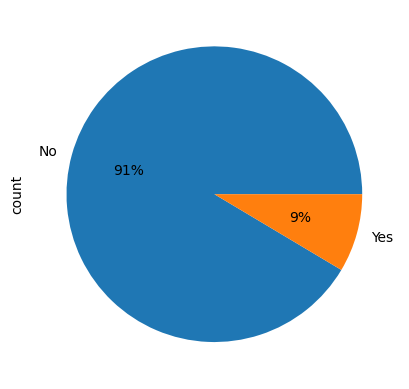

In [38]:
df['HeartDisease'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

observation: we can observe that the target class distribution is highly imbalanced

8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features 
and write your observations.

In [49]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print(categorical_features)


Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


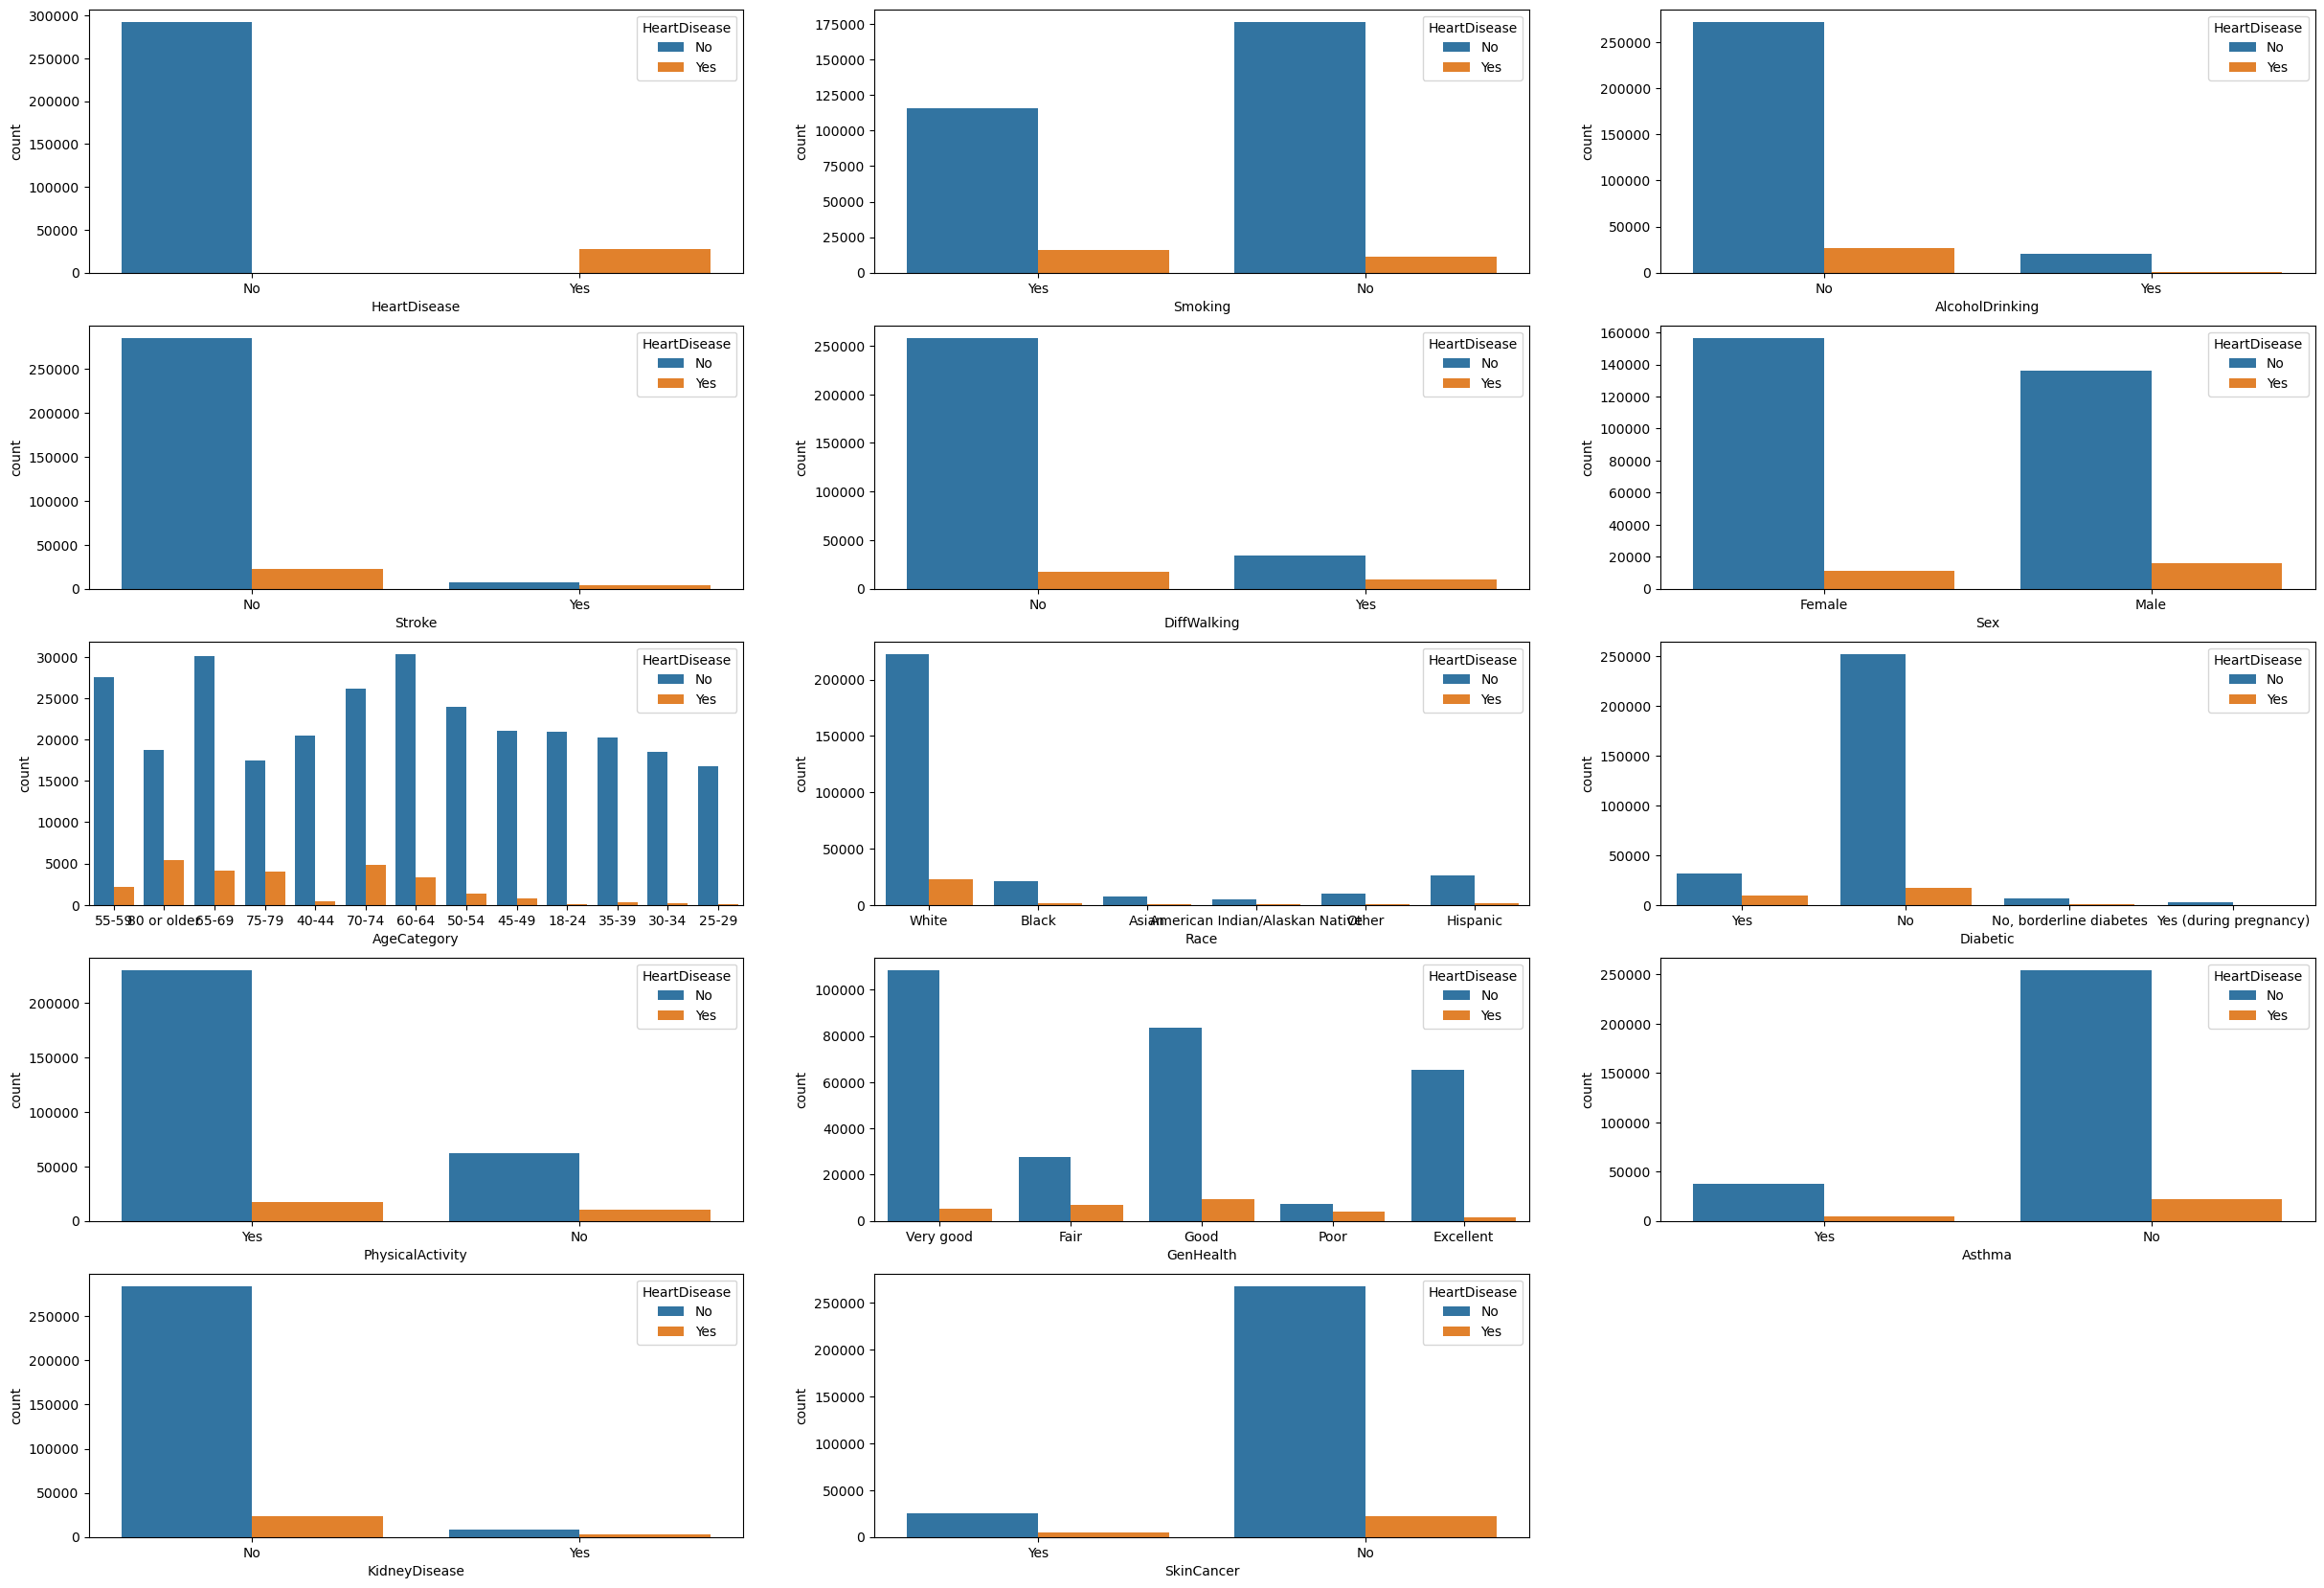

In [51]:
i=1
plt.figure(figsize=(30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x=feature,hue='HeartDisease', data=df)
    i+=1

•	From the plot we can observe that:
•	People who can smoke have higher chance  of  heart disease  than  non smokers
•	Males are more prone to suffer from heart disease  as compared to females
•	People with age limit in between  55-75 higher chances to get  heart diseases
•	If person have difficulty in walking and climbing stairs there is a high probability that he /she suffering from heart        disease
•	There is a higher chances a person have heart disease. If he does not have any kidney disease


 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 
'Yes' and 'No, borderline diabetes' as 'No'.

In [26]:
unique_categories = df['Diabetic'].unique()
print("Unique categories in the 'Diabetic' column:\n", unique_categories)

Unique categories in the 'Diabetic' column:
 ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


In [27]:
df['Diabetic'].replace({'Yes (during pregnancy)': 'Yes', 'No, borderline diabetes': 'No'}, inplace=True)

In [28]:
updated_categories = df['Diabetic'].unique()
print("Updated unique categories in the 'Diabetic' column:\n", updated_categories)

Updated unique categories in the 'Diabetic' column:
 ['Yes' 'No']


10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1.

In [60]:
df['HeartDisease'].replace({'Yes': 1,'No': 0}, inplace=True)

In [61]:
df['HeartDisease'].value_counts()

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [58]:
label_encoder = LabelEncoder()
df['AgeCategory'] = label_encoder.fit_transform(df['AgeCategory'])
df['Race'] = label_encoder.fit_transform(df['Race'])
df['GenHealth'] = label_encoder.fit_transform(df['GenHealth'])

In [59]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [63]:
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,7,5,Yes,Yes,4,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,12,5,No,Yes,4,7.0,No,No,No


12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [64]:
# Store the target column in the y variable
y = df['HeartDisease']

# Store the rest of the columns in the X variable
X = df.drop('HeartDisease', axis=1)

13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [65]:

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('HeartDisease', axis=1), df['HeartDisease'], test_size=0.3, random_state=42)

# Print the shape of the train and test data
print("Train data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Train data shape: (223856, 17) (223856,)
Test data shape: (95939, 17) (95939,)


14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [69]:
#Load the train and test data into separate DataFrames:
train_data = pd.read_csv('heart_data.csv')
test_data = pd.read_csv('heart_data.csv')

In [71]:
#Identify the numerical columns that need to be standardized:
numerical_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']  

In [72]:
#Create an instance of the StandardScaler:
scaler = StandardScaler()

In [73]:
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

In [77]:
#Transform the test data using the scaler fitted on the train data:
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

In [78]:
train_data.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-1.844750,Yes,No,No,-0.046751,3.281069,No,Female,55-59,White,Yes,Yes,Very good,-1.460354,Yes,No,Yes
1,No,-1.256338,No,No,Yes,-0.424070,-0.490039,No,Female,80 or older,White,No,Yes,Very good,-0.067601,No,No,No


In [79]:
test_data.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-1.844750,Yes,No,No,-0.046751,3.281069,No,Female,55-59,White,Yes,Yes,Very good,-1.460354,Yes,No,Yes
1,No,-1.256338,No,No,Yes,-0.424070,-0.490039,No,Female,80 or older,White,No,Yes,Very good,-0.067601,No,No,No


15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [156]:
def fit_and_predict(model,X_train,X_test,y_train,y_test):
    
    # Fit the model with train data
    model.fit(X_train,y_train)
    
    # Making prediction on test data
    prediction=model.predict(X_test)
    
    # Calculate the accuracy score
    accuracy=accuracy_score(y_test,prediction)
    
    return accuracy

In [ ]:
# Testing the fit_and_predict function
lr= LogisticRegression()

Label = 'LogisticRegression'

rs = pd.DataFrame(columns=['Accuracy'])

rs.loc[Label]= fit_and_predict(lr,X_train,X_test,y_train,y_test)

rs

16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [158]:
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()


# Defining the base estimators for the Stacking Classifier
estimators = [('rf', rf),('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [ ]:
# Listing of models and their names
models = [lr, nb, knn, dt, rf, adb, gb, sc]
names = ['Logistic Regression','Naive Bayes','KNN','Decision tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']

# Create a dictionary to store the scores
accuracy_scores = {} 

# Training each model and printing their accuracy
for model, name in zip(models, names):
    accuracy = fit_and_predict(model, X_train, X_test, y_train, y_test)
    accuracy_scores[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

In [ ]:
Logistic Regression Accuracy: 0.9096
Naive Bayes Accuracy: 0.8406
KNN Accuracy: 0.9007
Decision tree Accuracy: 0.8545
Random Forest Accuracy: 0.8987
Ada Boost Accuracy: 0.9098
Gradient Boost Accuracy: 0.9101
Stacking Accuracy: 0.9050